# <p style="background-color:#512125;font-family:newtimeroman;color:#ffffff;font-size:150%;text-align:center;border-radius:10px 10px;">Proyecto Predicción Diamante</p>
---

[![Banner-Proyecto-Diamante.png](https://i.postimg.cc/XvQBVY1Z/Banner-Proyecto-Diamante.png)](https://postimg.cc/KK38fx2F)

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#sec_1">Introducción</a>  
2. <a href="#sec_2">Exploración del set de datos</a>  
3. <a href="#sec_3">Selección de Muestras</a>  
4. <a href="#sec_4">Pre-selección de variables</a>  
5. <a href="#sec_5">Preparación de datos</a>
6. <a href="#sec_6">Modelo de regresión Lineal</a>  
7. <a href="#sec_7">Métricas de desempeño</a> 
8. <a href="#sec_8">Conclusiones y Recomendaciones</a>     

 
</font>
</div>

<a id='sec_1'></a>
## `1. Introducción`

`💎 Explorando el Valor de los Diamantes 💎`

En el fascinante mundo de las piedras preciosas, cada diamante tiene una historia que contar a través de sus atributos únicos. 🌟 Nuestro proyecto se sumerge en un conjunto de datos de casi 54,000 diamantes, analizando factores clave como el precio 💵, el peso en quilates 📏, la calidad de corte ✂️, el color 🌈, y la claridad 🔍. Además, examinamos medidas precisas como longitud 📐, ancho 📏 y profundidad 📊. Con esta rica información, buscamos predecir con precisión el valor de cada diamante, optimizando la estimación de precios y proporcionando una herramienta invaluable para la toma de decisiones en el mercado de joyas. 💍✨

**1.2. Recursos disponibles**
- [Set de datos Diamond](Proyecto_diamantes/data/diamonds2.csv)

**1.3. Diccionario de datos disponibles**
| **Clave** | **Descripción** | **Tipo de dato** |
|---|---|---|
| price | precio en dólares estadounidenses | Int |
| carat | Peso en quilates del diamante | Float |
| cut | calidad de corte del corte (Fair, Good, Very Good, Premium, Ideal) | Object |
| color | color del diamante de J (peor) a D (mejor) | Object |
| clarity | medida de qué tan claro es el diamante (I1 (peor), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (mejor)). | Object |
| x | longitud en mm | Float |
| y | ancho en mm | Float |
| z | Profundidad en mm | Float |
| depth | porcentaje de profundidad total | Float |
| table | Ancho de la parte superior del diamante en relación con el punto más ancho | Float |

<a id='sec_2'></a>
## `2. Exploración del set de datos`

El objetivo de esta fase es poder familiarizarnos con la información contenida en el set de datos.

1. Leer el set de datos
2. Entender tamaño, columnas y filas del set de datos
3. Entender qué tipos de datos tenemos en cada columna
4. Verificar si hay datos faltantes y valores duplicados
5. Identificar los principales atributos
6. Encoder para atributos categoricas

**2.1. Leer el set de datos**

In [868]:
import pandas as pd

In [869]:
df = pd.read_csv(r"Proyecto_diamantes/data/diamonds2.csv", index_col = 'Unnamed: 0')
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,NaN,2.75


**2.2. Entender tamaño, columnas y filas del set de datos**

In [870]:
print(f'El número de filas es: {df.shape[0]}')
print(f'El número de columnas es: {df.shape[1]}')

El número de filas es: 53940
El número de columnas es: 10


**2.3. Entender qué tipos de datos tenemos en cada columna**

In [871]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        43112 non-null  float64
 8   y        43048 non-null  float64
 9   z        43237 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


>**Observación**
> - Al poder observar a mas detalle el tipo de dato que tiene cada columna, se pudo ver que exiten datos de tipo `int` , `float` y `Object`.
>- Al poder observar a mas detalle se tiene en cantida de tipo de dato `float64(6)`, `int64(1)`, `object(3)`

**2.4. Verificar si hay datos faltantes y valores duplicados**

In [872]:
df.duplicated().sum()

55

>**Observación**
> - Al observar se pudo evidenciar que si hay valores duplicados.

In [873]:
df = df.drop_duplicates()

In [874]:
df.duplicated().sum()

0

>**Observación**
> - Al observar se pudo evidenciar que ya no hay valores duplicados.

**2.5. Identificar los principales atributos**

In [875]:
# Variable objetivo
target = 'price'

In [876]:
df.select_dtypes(include=['number']).columns.tolist()

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [877]:
# Identificar las variables numéricas utilizando el atributo dtypes
variables_numericas = df.select_dtypes(include=['number']).columns.tolist()
variables_numericas.remove(target)

In [878]:
variables_numericas

['carat', 'depth', 'table', 'x', 'y', 'z']

In [879]:
# Identificar las variables categóricas utilizando el atributo dtypes
variables_categoricas = df.select_dtypes(include=['object']).columns.tolist()
variables_categoricas

['cut', 'color', 'clarity']

In [880]:
dataResume = pd.DataFrame({'feature' : variables_numericas, 'type' : 'numeric'})
dataResume = pd.concat([dataResume, pd.DataFrame({'feature' : variables_categoricas, 'type' : 'object'})])
dataResume = pd.concat([dataResume, pd.DataFrame({'feature' : [target], 'type' : 'target'})])
dataResume.to_csv('dataResume.csv', index = 0)
dataResume

,feature,type
0,carat,numeric
1,depth,numeric
2,table,numeric
3,x,numeric
4,y,numeric
5,z,numeric
0,cut,object
1,color,object
2,clarity,object
0,price,target


>**Observación**
>- Se puede observar que se los princiaples atributos estan con ss respectivo tipo de datos y en este caso nuestro target es `price`

**2.6. Analisis para atributos categoricas**

[![foto-diamante-informaci-n.jpg](https://i.postimg.cc/9QTX5HLr/foto-diamante-informaci-n.jpg)](https://postimg.cc/xXfVMhD2)

>**Observación**
>- Se puede observar que la imagen anterior nos indica que la caracteristica de color , cut y clarity si tienen un orden , es decir son variables categoricas ordinales
>- link de la información https://www.goldandtime.org/noticia/83635/goldtime/cuales-son-los-criterios-para-evaluar-diamantes-que-empleamos-los-tasadores.html

In [881]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

df_encoder = df.copy(deep=True)
encoder_cut = OrdinalEncoder(categories=[["Fair", "Good", "Very Good", "Premium", "Ideal"]])
encoder_color = OrdinalEncoder(categories=[['J', 'I', 'H', 'G', 'F', 'E', 'D']])
encoder_clarity = OrdinalEncoder(categories=[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']])

# Aplicación del codificador
df_encoder["cut"] = encoder_cut.fit_transform(df_encoder[["cut"]])
df_encoder["color"] = encoder_color.fit_transform(df_encoder[["color"]])
df_encoder["clarity"] = encoder_clarity.fit_transform(df_encoder[["clarity"]])
df_encoder

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,4.0,5.0,1.0,61.5,55.0,326,3.95,3.98,2.43
2,0.21,3.0,5.0,2.0,59.8,61.0,326,3.89,3.84,2.31
3,0.23,1.0,5.0,4.0,56.9,65.0,327,4.05,4.07,2.31
4,0.29,3.0,1.0,3.0,62.4,58.0,334,4.20,4.23,2.63
5,0.31,1.0,0.0,1.0,63.3,58.0,335,4.34,NaN,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,4.0,6.0,2.0,60.8,57.0,2757,5.75,5.76,NaN
53937,0.72,1.0,6.0,2.0,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,2.0,6.0,2.0,62.8,60.0,2757,5.66,5.68,NaN
53939,0.86,3.0,2.0,1.0,61.0,58.0,2757,6.15,6.12,3.74


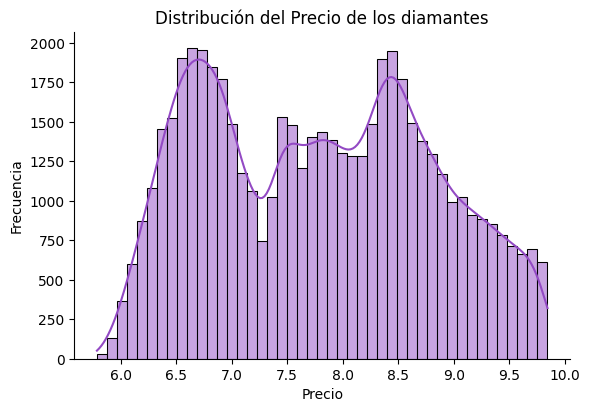

In [882]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.displot(np.log(df_encoder['price']), height=4, aspect=1.5, kde=True, color = '#934ac4')
plt.title("Distribución del Precio de los diamantes", fontsize=12)  
plt.xlabel("Precio", fontsize=10)  
plt.ylabel("Frecuencia", fontsize=10) 

plt.savefig("dist_price.png") 
plt.show();

In [883]:
df_encoder['price'] = np.log(df_encoder['price'])

>-**Observación**
>- La variable `precio` tiene naturaleza que se ajusta a un comportamiento de distribución `lognormal`, por ello, trabajaremos con el valor logarítmico del precio para nuestras correlaciones.

In [884]:
variables_numericas = df_encoder.select_dtypes(include=['number']).columns.tolist()
variables_numericas.remove(target)

In [885]:
dataResume['type'] = dataResume['type'].replace({'object':'numeric'})
dataResume.to_csv('dataResume.csv')

In [886]:
dataResume

,feature,type
0,carat,numeric
1,depth,numeric
2,table,numeric
3,x,numeric
4,y,numeric
5,z,numeric
0,cut,numeric
1,color,numeric
2,clarity,numeric
0,price,target


In [887]:
import matplotlib.pyplot as plt
import seaborn as sns

color_pastel = sns.color_palette("pastel")[1]  
plt.figure(figsize=(8, 6))
for col in variables_numericas:
    plt.figure()  
    sns.histplot(df_encoder[col], kde=True, color=color_pastel)
    plt.title("Distribución de " + col, fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Frecuencia", fontsize=10)
    plt.savefig("Proyecto_diamantes/plots/dist_" + col + ".png")
    plt.close()

<Figure size 800x600 with 0 Axes>

<a id='sec_3'></a>
## `3. Selección de muestras`

El objetivo de esta fase es poder divir en dos partes: el conjunto de entrenamiento (train) y el conjunto de prueba (test). Estas divisiones se utilizan para entrenar y evaluar los modelos.

- `|Train:|` El conjunto de entrenamiento se utiliza para entrenar el modelo de aprendizaje automático. Es aquí donde el modelo "aprende" los patrones y relaciones en los datos para poder hacer predicciones o clasificaciones.

- `|Test:|` El conjunto de prueba se utiliza para evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento. Es una medida objetiva de la capacidad del modelo para generalizar y realizar predicciones precisas en nuevos datos.

1. División del dataset de datos
2. Analisis exploratorio de relación de datos
3. Creación de una variable apartir de rangos de quilates de los diamantes
4. Analisis exploratorio de rangos de quilates de los diamantes por el precio

**3.1. División del dataset de datos**

In [888]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_encoder,
                               train_size = 0.7,
                               random_state = 42)

In [889]:
print(f"Tamaño del total de datos: {len(df_encoder)}")
print(f"Tamaño de train: {len(train)}")
print(f"Tamaño de test: {len(test)}")

Tamaño del total de datos: 53885
Tamaño de train: 37719
Tamaño de test: 16166


>**Observación**
>- Se puede observar que el dataset se ha dividido en 2 partes, en `train` y `test`

**3.2. Analisis exploratorio de relación de datos**

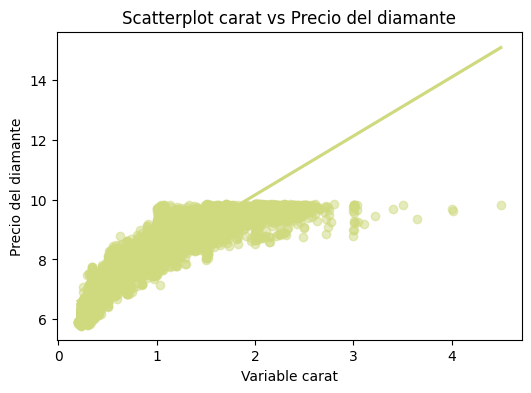

In [890]:
plt.figure(figsize=(6, 4))
sns.regplot(x = train['carat'], y = train['price'], scatter_kws={"alpha": 0.5}, color = '#cfd97d')
plt.title(f"Scatterplot carat vs Precio del diamante")
plt.xlabel("Variable carat")
plt.ylabel("Precio del diamante")
plt.show()

In [891]:
plt.figure(figsize=(4, 6))  

for col in variables_numericas:
  sns.regplot(x = train[col], y = train[target], scatter_kws={"alpha": 0.5})
  plt.title(f"Scatterplot {col} vs Precio del diamante")
  plt.xlabel(f"Variable {col}")
  plt.ylabel("Precio del diamante")
  plt.savefig("Proyecto_diamantes/plots/scatter_" + col + ".png") 
  plt.close()

**3.3. Creación de una variable apartir de rangos de quilates de los diamantes**

In [892]:
def rangos_quilates(x):
    if x < 1:
        return 1
    elif x >= 1 and x < 1.5:
        return 2
    elif x >= 1.5 and x < 2:
        return 3
    else:
        return 4

In [893]:
train['rango_carat'] = train['carat'].apply( lambda x: rangos_quilates(x))
test['rango_carat'] = test['carat'].apply( lambda x: rangos_quilates(x))

*Filtro por rango de quilates para gráficar*

In [894]:
train_cara_q1 = train[train['rango_carat'] == 1]
train_cara_q2 = train[train['rango_carat'] == 2]
train_cara_q3 = train[train['rango_carat'] == 3]
train_cara_q4 = train[train['rango_carat'] == 4]

**3.4. Analisis exploratorio de rangos de quilates de los diamantes por el precio**

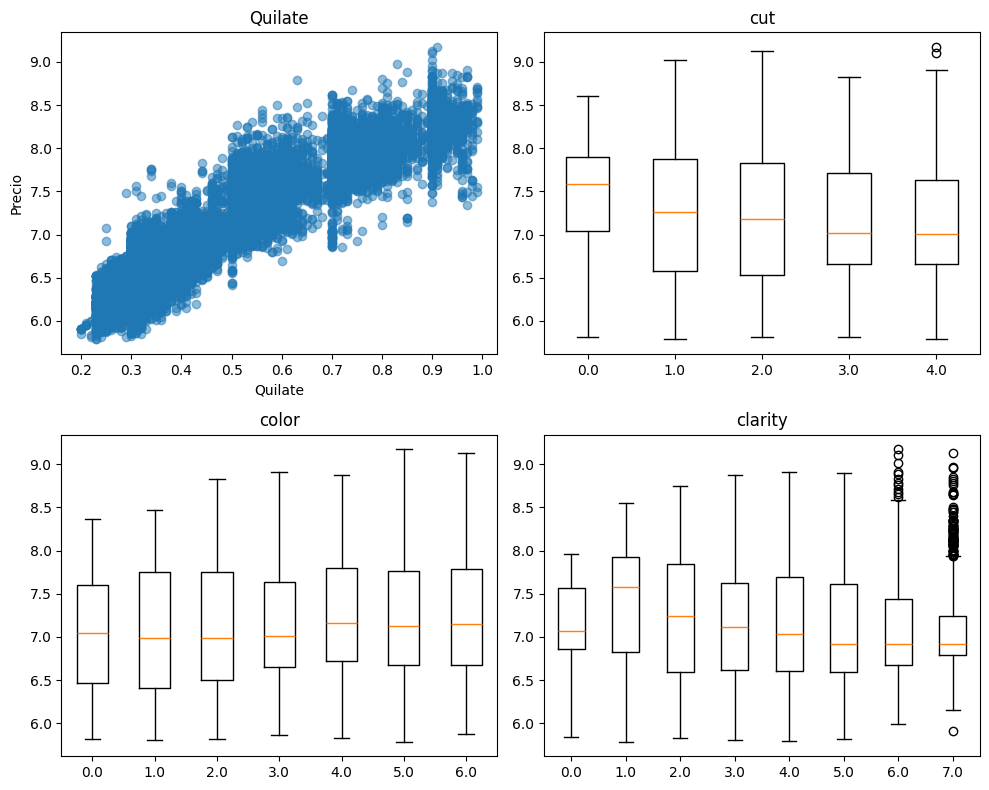

In [895]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Gráfico de dispersión para Quilate
axs[0,0].scatter(train_cara_q1['carat'], train_cara_q1['price'], alpha=0.5)
axs[0,0].set_title('Quilate')
axs[0,0].set_xlabel('Quilate')
axs[0,0].set_ylabel('Precio')

# Gráfico de caja para Corte
axs[0, 1].boxplot([train_cara_q1[train_cara_q1['cut'] == x]['price'] for x in sorted(train_cara_q1['cut'].unique())])
axs[0, 1].set_title('cut')
axs[0, 1].set_xticklabels(sorted(train_cara_q1['cut'].unique()))

# Gráfico de caja para Color
axs[1, 0].boxplot([train_cara_q1[train_cara_q1['color'] == x]['price'] for x in sorted(train_cara_q1['color'].unique())])
axs[1, 0].set_title('color')
axs[1, 0].set_xticklabels(sorted(train_cara_q1['color'].unique()))

# Gráfico de caja para claridad
axs[1, 1].boxplot([train_cara_q1[train_cara_q1['clarity'] == x]['price'] for x in sorted(train_cara_q1['clarity'].unique())])
axs[1, 1].set_title('clarity')
axs[1, 1].set_xticklabels(sorted(train_cara_q1['clarity'].unique()))

plt.tight_layout()
plt.savefig("Proyecto_diamantes/rangos_quilates/rangos_1.png") 
plt.show()


>**Observación**
>- Menores a 1 quilate la variable que tiene mayor injerencia es el propio valor del quilate (R2=0.84). Las propiedades como la Claridad, Color y Corte no tienen relevancia.

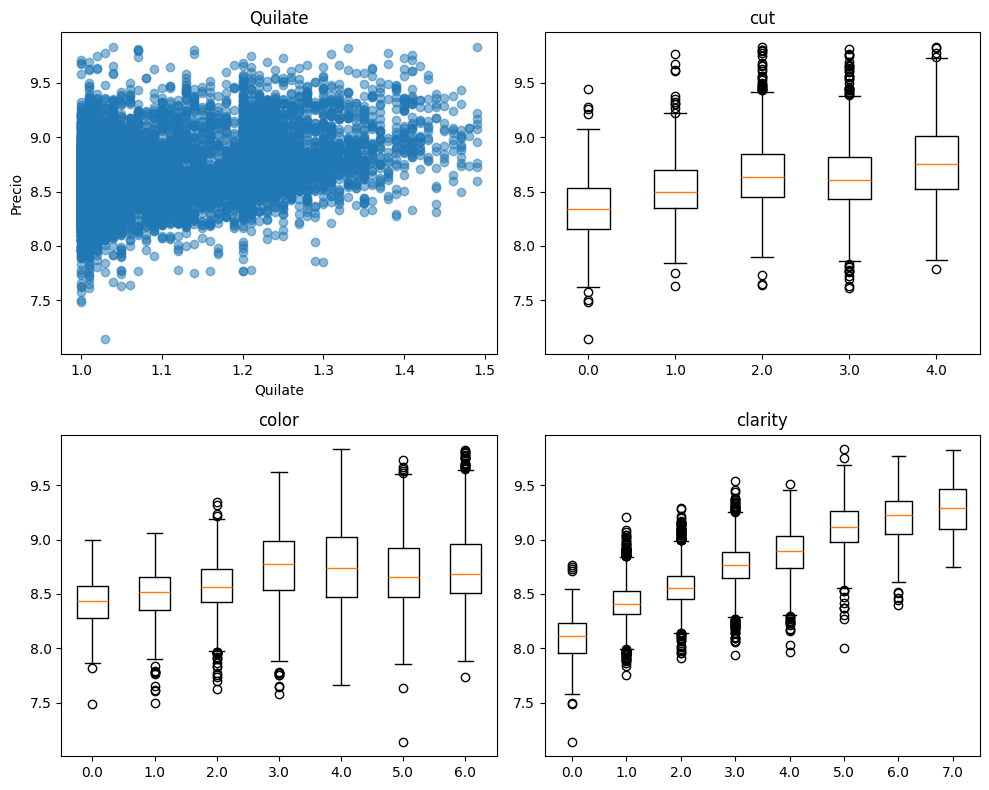

In [896]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Gráfico de dispersión para Quilate
axs[0,0].scatter(train_cara_q2['carat'], train_cara_q2['price'], alpha=0.5)
axs[0,0].set_title('Quilate')
axs[0,0].set_xlabel('Quilate')
axs[0,0].set_ylabel('Precio')

# Gráfico de caja para Corte
axs[0, 1].boxplot([train_cara_q2[train_cara_q2['cut'] == x]['price'] for x in sorted(train_cara_q2['cut'].unique())])
axs[0, 1].set_title('cut')
axs[0, 1].set_xticklabels(sorted(train_cara_q2['cut'].unique()))

# Gráfico de caja para Color
axs[1, 0].boxplot([train_cara_q2[train_cara_q2['color'] == x]['price'] for x in sorted(train_cara_q2['color'].unique())])
axs[1, 0].set_title('color')
axs[1, 0].set_xticklabels(sorted(train_cara_q2['color'].unique()))

# Gráfico de caja para claridad
axs[1, 1].boxplot([train_cara_q2[train_cara_q2['clarity'] == x]['price'] for x in sorted(train_cara_q2['clarity'].unique())])
axs[1, 1].set_title('clarity')
axs[1, 1].set_xticklabels(sorted(train_cara_q2['clarity'].unique()))

plt.tight_layout()
plt.savefig("Proyecto_diamantes/rangos_quilates/rangos_2.png") 
plt.show()


>**Observación**
>- Para los diamantes de 1 a 1.5 quilates, el precio depende principalmente de la Claridad, ligeramente del Color y Corte. El valor del quilate no tiene injerencia.

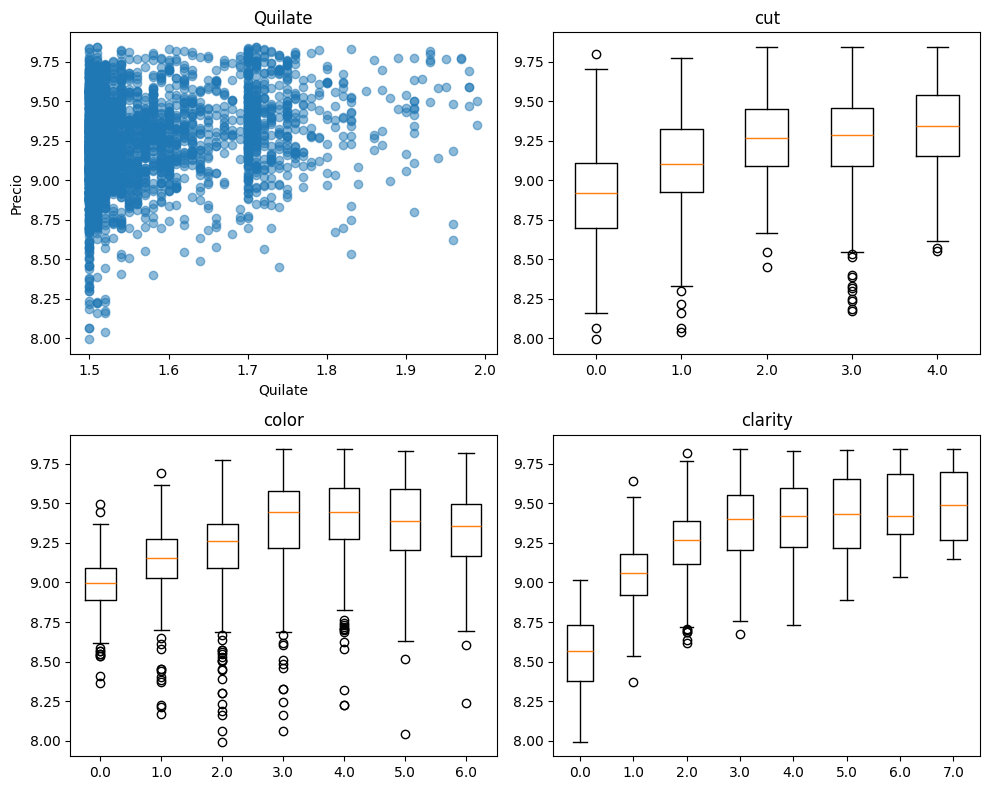

In [897]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Gráfico de dispersión para Quilate
axs[0,0].scatter(train_cara_q3['carat'], train_cara_q3['price'], alpha=0.5)
axs[0,0].set_title('Quilate')
axs[0,0].set_xlabel('Quilate')
axs[0,0].set_ylabel('Precio')

# Gráfico de caja para Corte
axs[0, 1].boxplot([train_cara_q3[train_cara_q3['cut'] == x]['price'] for x in sorted(train_cara_q3['cut'].unique())])
axs[0, 1].set_title('cut')
axs[0, 1].set_xticklabels(sorted(train_cara_q3['cut'].unique()))

# Gráfico de caja para Color
axs[1, 0].boxplot([train_cara_q3[train_cara_q3['color'] == x]['price'] for x in sorted(train_cara_q3['color'].unique())])
axs[1, 0].set_title('color')
axs[1, 0].set_xticklabels(sorted(train_cara_q3['color'].unique()))

# Gráfico de caja para claridad
axs[1, 1].boxplot([train_cara_q3[train_cara_q3['clarity'] == x]['price'] for x in sorted(train_cara_q3['clarity'].unique())])
axs[1, 1].set_title('clarity')
axs[1, 1].set_xticklabels(sorted(train_cara_q3['clarity'].unique()))

plt.tight_layout()
plt.savefig("Proyecto_diamantes/rangos_quilates/rangos_3.png") 
plt.show()

>**Observación**
>- Para los diamantes de 1.5 a 2.0 quilates, el precio depende principalmente de la Claridad, y en menor medida, del Corte y Color. El valor del quilate no tiene injerencia.

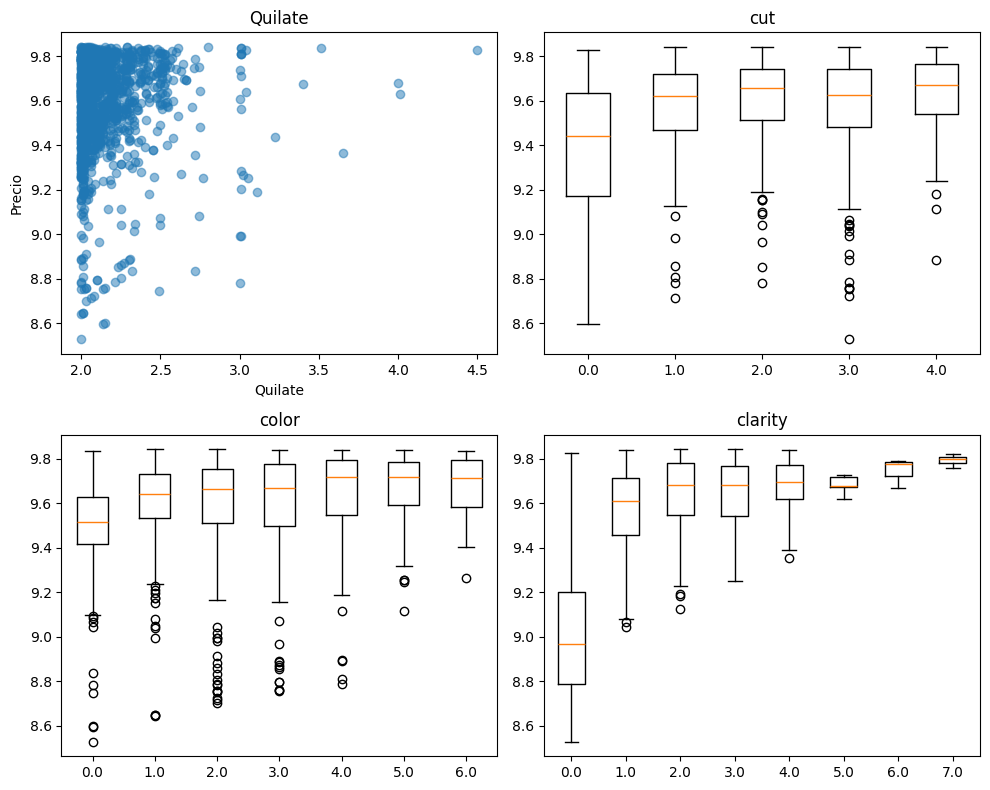

In [898]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Gráfico de dispersión para Quilate
axs[0,0].scatter(train_cara_q4['carat'], train_cara_q4['price'], alpha=0.5)
axs[0,0].set_title('Quilate')
axs[0,0].set_xlabel('Quilate')
axs[0,0].set_ylabel('Precio')

# Gráfico de caja para Corte
axs[0, 1].boxplot([train_cara_q4[train_cara_q4['cut'] == x]['price'] for x in sorted(train_cara_q4['cut'].unique())])
axs[0, 1].set_title('cut')
axs[0, 1].set_xticklabels(sorted(train_cara_q4['cut'].unique()))

# Gráfico de caja para Color
axs[1, 0].boxplot([train_cara_q4[train_cara_q4['color'] == x]['price'] for x in sorted(train_cara_q4['color'].unique())])
axs[1, 0].set_title('color')
axs[1, 0].set_xticklabels(sorted(train_cara_q4['color'].unique()))

# Gráfico de caja para claridad
axs[1, 1].boxplot([train_cara_q4[train_cara_q4['clarity'] == x]['price'] for x in sorted(train_cara_q4['clarity'].unique())])
axs[1, 1].set_title('clarity')
axs[1, 1].set_xticklabels(sorted(train_cara_q4['clarity'].unique()))

plt.tight_layout()
plt.savefig("Proyecto_diamantes/rangos_quilates/rangos_4.png") 
plt.show()

>**Observación**
>- Para los diamantes mayor a 2.0 quilates, salvo para el menor valor de Claridad (I1), el precio depende muy ligeramente de la Claridad, del Corte y Color. El valor del quilate no tiene relevante injerencia.

<a id='sec_4'></a>
## `4. Pre-selección de variables`

El objetivo de esta fase es poder Pre-Seleccionar las variable que tenga una mejor correlación con nuestro target `price`,
basado con un analisis estadistico, missings y correlación.

1. Analisis estadisticos
2. Missing y Fillrate
3. Creación de correlación con de los features con nuestro target
4. Exportación de datos generados
5. Pre-Selección de variables

**4.1. Analisis estadisticos**

In [899]:
pdResume = train.describe().transpose()
pdResume.reset_index(inplace = True)
pdResume.rename(columns = {'index' : 'feature',
                           '25%' : 'Q1',
                           '50%' : 'median',
                           '75%' : 'Q3'}, inplace = True)
pdResume

,feature,count,mean,std,min,Q1,median,Q3,max
0,carat,37719.0,0.800223,0.475464,0.200000,0.400000,0.700000,1.0400,4.500000
1,cut,37719.0,2.902993,1.115857,0.000000,2.000000,3.000000,4.0000,4.000000
2,color,37719.0,3.402768,1.700173,0.000000,2.000000,3.000000,5.0000,6.000000
3,clarity,37719.0,3.059466,1.650228,0.000000,2.000000,3.000000,4.0000,7.000000
4,depth,37719.0,61.747867,1.432647,43.000000,61.000000,61.800000,62.5000,79.000000
5,table,37719.0,57.467523,2.221136,43.000000,56.000000,57.000000,59.0000,79.000000
6,price,37719.0,7.792273,1.016902,5.786897,6.862758,7.785305,8.5897,9.842835
7,x,30170.0,5.742950,1.125392,0.000000,4.720000,5.700000,6.5500,10.230000
8,y,30075.0,5.737424,1.167787,0.000000,4.720000,5.710000,6.5400,58.900000
9,z,30207.0,3.542410,0.714943,0.000000,2.910000,3.530000,4.0400,31.800000


**4.2. Missing y Fillrate**

In [900]:
pdResume[['missing_rate']] = 1 - pdResume[['count']]/train.shape[0]
pdResume.sort_values(by = 'missing_rate', ascending = False, inplace = True)
pdResume

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate
8,y,30075.0,5.737424,1.167787,0.000000,4.720000,5.710000,6.5400,58.900000,0.202656
7,x,30170.0,5.742950,1.125392,0.000000,4.720000,5.700000,6.5500,10.230000,0.200138
9,z,30207.0,3.542410,0.714943,0.000000,2.910000,3.530000,4.0400,31.800000,0.199157
0,carat,37719.0,0.800223,0.475464,0.200000,0.400000,0.700000,1.0400,4.500000,0.000000
1,cut,37719.0,2.902993,1.115857,0.000000,2.000000,3.000000,4.0000,4.000000,0.000000
2,color,37719.0,3.402768,1.700173,0.000000,2.000000,3.000000,5.0000,6.000000,0.000000
3,clarity,37719.0,3.059466,1.650228,0.000000,2.000000,3.000000,4.0000,7.000000,0.000000
4,depth,37719.0,61.747867,1.432647,43.000000,61.000000,61.800000,62.5000,79.000000,0.000000
5,table,37719.0,57.467523,2.221136,43.000000,56.000000,57.000000,59.0000,79.000000,0.000000
6,price,37719.0,7.792273,1.016902,5.786897,6.862758,7.785305,8.5897,9.842835,0.000000


**4.3. Creación de correlación con de los features con nuestro target**

In [901]:
correlations = train.corr()[['price']]
correlations.reset_index(inplace = True)
correlations.rename(columns = {'index' : 'feature',
                               'price' : 'corr'}, inplace = True)
correlations

,feature,corr
0,carat,0.920711
1,cut,-0.085212
2,color,-0.155016
3,clarity,-0.214268
4,depth,0.000271
5,table,0.158284
6,price,1.000000
7,x,0.958041
8,y,0.919583
9,z,0.924438


In [902]:
univariate = pd.merge(pdResume, correlations, on = 'feature')
univariate.head()

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr
0,y,30075.0,5.737424,1.167787,0.0,4.72,5.71,6.54,58.90,0.202656,0.919583
1,x,30170.0,5.742950,1.125392,0.0,4.72,5.70,6.55,10.23,0.200138,0.958041
2,z,30207.0,3.542410,0.714943,0.0,2.91,3.53,4.04,31.80,0.199157,0.924438
3,carat,37719.0,0.800223,0.475464,0.2,0.40,0.70,1.04,4.50,0.000000,0.920711
4,cut,37719.0,2.902993,1.115857,0.0,2.00,3.00,4.00,4.00,0.000000,-0.085212


*Creación de una columna llamada correlacion absoluta(abs_corr)*

In [903]:
# Creamos la columna correlacion absoluta
univariate['abs_corr'] = univariate['corr'].apply(lambda x: abs(x))
univariate.sort_values(by = 'abs_corr', ascending = False, inplace=True)
univariate.head()

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr,abs_corr
9,price,37719.0,7.792273,1.016902,5.786897,6.862758,7.785305,8.5897,9.842835,0.000000,1.000000,1.000000
1,x,30170.0,5.742950,1.125392,0.000000,4.720000,5.700000,6.5500,10.230000,0.200138,0.958041,0.958041
2,z,30207.0,3.542410,0.714943,0.000000,2.910000,3.530000,4.0400,31.800000,0.199157,0.924438,0.924438
3,carat,37719.0,0.800223,0.475464,0.200000,0.400000,0.700000,1.0400,4.500000,0.000000,0.920711,0.920711
0,y,30075.0,5.737424,1.167787,0.000000,4.720000,5.710000,6.5400,58.900000,0.202656,0.919583,0.919583


In [904]:
univariate

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr,abs_corr
9,price,37719.0,7.792273,1.016902,5.786897,6.862758,7.785305,8.5897,9.842835,0.000000,1.000000,1.000000
1,x,30170.0,5.742950,1.125392,0.000000,4.720000,5.700000,6.5500,10.230000,0.200138,0.958041,0.958041
2,z,30207.0,3.542410,0.714943,0.000000,2.910000,3.530000,4.0400,31.800000,0.199157,0.924438,0.924438
3,carat,37719.0,0.800223,0.475464,0.200000,0.400000,0.700000,1.0400,4.500000,0.000000,0.920711,0.920711
0,y,30075.0,5.737424,1.167787,0.000000,4.720000,5.710000,6.5400,58.900000,0.202656,0.919583,0.919583
10,rango_carat,37719.0,1.513163,0.804918,1.000000,1.000000,1.000000,2.0000,4.000000,0.000000,0.798036,0.798036
6,clarity,37719.0,3.059466,1.650228,0.000000,2.000000,3.000000,4.0000,7.000000,0.000000,-0.214268,0.214268
8,table,37719.0,57.467523,2.221136,43.000000,56.000000,57.000000,59.0000,79.000000,0.000000,0.158284,0.158284
5,color,37719.0,3.402768,1.700173,0.000000,2.000000,3.000000,5.0000,6.000000,0.000000,-0.155016,0.155016
4,cut,37719.0,2.902993,1.115857,0.000000,2.000000,3.000000,4.0000,4.000000,0.000000,-0.085212,0.085212


**4.4. Exportación de datos generados**

In [905]:
univariate.to_csv('Proyecto_diamantes/results/univariate_assesment.csv', index = 0)

**4.5. Pre-Selección de variables**

<Axes: >

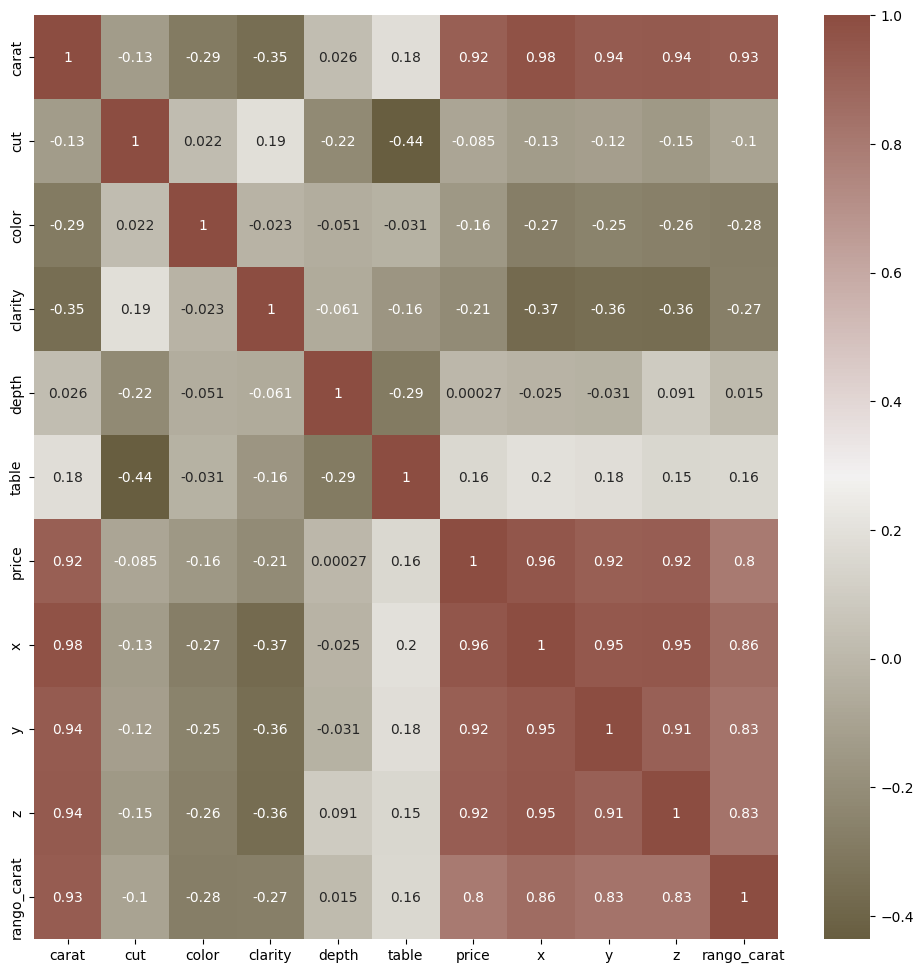

In [906]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= train.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [907]:
preselection = univariate.loc[(univariate['abs_corr'] >= 0.14) & (univariate['missing_rate'] <= 0.8)]
print(f"{len(preselection)} variables de {len(univariate)} pasan el proceso de pre-selección")

9 variables de 11 pasan el proceso de pre-selección


In [908]:
preselection

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr,abs_corr
9,price,37719.0,7.792273,1.016902,5.786897,6.862758,7.785305,8.5897,9.842835,0.000000,1.000000,1.000000
1,x,30170.0,5.742950,1.125392,0.000000,4.720000,5.700000,6.5500,10.230000,0.200138,0.958041,0.958041
2,z,30207.0,3.542410,0.714943,0.000000,2.910000,3.530000,4.0400,31.800000,0.199157,0.924438,0.924438
3,carat,37719.0,0.800223,0.475464,0.200000,0.400000,0.700000,1.0400,4.500000,0.000000,0.920711,0.920711
0,y,30075.0,5.737424,1.167787,0.000000,4.720000,5.710000,6.5400,58.900000,0.202656,0.919583,0.919583
10,rango_carat,37719.0,1.513163,0.804918,1.000000,1.000000,1.000000,2.0000,4.000000,0.000000,0.798036,0.798036
6,clarity,37719.0,3.059466,1.650228,0.000000,2.000000,3.000000,4.0000,7.000000,0.000000,-0.214268,0.214268
8,table,37719.0,57.467523,2.221136,43.000000,56.000000,57.000000,59.0000,79.000000,0.000000,0.158284,0.158284
5,color,37719.0,3.402768,1.700173,0.000000,2.000000,3.000000,5.0000,6.000000,0.000000,-0.155016,0.155016


>- **Observación**
>- Se puede observar que se ha seleccionado 9 variables de 11 las cuales pasan el proceso de pre-selección
>- Las columnas con mejor correlación es `carat, rango_carat , y, z, z`
>- Las columnas con menor correlación es `table, clarity ,color`

<a id='sec_5'></a>
## `5. Preparación de datos`

El objetivo de esta fase es poder preparas nuestros feature para antes de poder utilizar nuestros modelos de Machine Learning

1. Tratamiento de outliers
2. Tratamiento de missings
3. Reescalamiento de datos por Z-Score


**5.1. Tratamiento de outliers**

[![image.png](https://i.postimg.cc/3R620sz5/image.png)](https://postimg.cc/ftcV6rwB)

>**Rango Intercuantílico**
>- El tratamiento de outliers utilizando el rango intercuartílico (IQR, por sus siglas en inglés) es una técnica común para identificar y manejar valores atípicos en un conjunto de datos. El rango intercuartílico es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1) de los datos.

*Cargando nuestro archivo donde se guardo los datos Pre-Seleccionados*

In [909]:
univariate_II = pd.read_csv('Proyecto_diamantes/results/univariate_assesment.csv')
univariate_II.head()

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr,abs_corr
0,price,37719.0,7.792273,1.016902,5.786897,6.862758,7.785305,8.5897,9.842835,0.000000,1.000000,1.000000
1,x,30170.0,5.742950,1.125392,0.000000,4.720000,5.700000,6.5500,10.230000,0.200138,0.958041,0.958041
2,z,30207.0,3.542410,0.714943,0.000000,2.910000,3.530000,4.0400,31.800000,0.199157,0.924438,0.924438
3,carat,37719.0,0.800223,0.475464,0.200000,0.400000,0.700000,1.0400,4.500000,0.000000,0.920711,0.920711
4,y,30075.0,5.737424,1.167787,0.000000,4.720000,5.710000,6.5400,58.900000,0.202656,0.919583,0.919583


*Calculando los intervalos RIC*

In [910]:
univariate_II['ric']     = univariate_II['Q3'] - univariate_II['Q1']
univariate_II['min_ric'] = univariate_II['Q1'] - 1.5*univariate_II['ric']
univariate_II['max_ric'] = univariate_II['Q3'] + 1.5*univariate_II['ric']
univariate_II.head()

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr,abs_corr,ric,min_ric,max_ric
0,price,37719.0,7.792273,1.016902,5.786897,6.862758,7.785305,8.5897,9.842835,0.000000,1.000000,1.000000,1.726942,4.272345,11.180113
1,x,30170.0,5.742950,1.125392,0.000000,4.720000,5.700000,6.5500,10.230000,0.200138,0.958041,0.958041,1.830000,1.975000,9.295000
2,z,30207.0,3.542410,0.714943,0.000000,2.910000,3.530000,4.0400,31.800000,0.199157,0.924438,0.924438,1.130000,1.215000,5.735000
3,carat,37719.0,0.800223,0.475464,0.200000,0.400000,0.700000,1.0400,4.500000,0.000000,0.920711,0.920711,0.640000,-0.560000,2.000000
4,y,30075.0,5.737424,1.167787,0.000000,4.720000,5.710000,6.5400,58.900000,0.202656,0.919583,0.919583,1.820000,1.990000,9.270000


In [911]:
univariate_II

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr,abs_corr,ric,min_ric,max_ric
0,price,37719.0,7.792273,1.016902,5.786897,6.862758,7.785305,8.5897,9.842835,0.000000,1.000000,1.000000,1.726942,4.272345,11.180113
1,x,30170.0,5.742950,1.125392,0.000000,4.720000,5.700000,6.5500,10.230000,0.200138,0.958041,0.958041,1.830000,1.975000,9.295000
2,z,30207.0,3.542410,0.714943,0.000000,2.910000,3.530000,4.0400,31.800000,0.199157,0.924438,0.924438,1.130000,1.215000,5.735000
3,carat,37719.0,0.800223,0.475464,0.200000,0.400000,0.700000,1.0400,4.500000,0.000000,0.920711,0.920711,0.640000,-0.560000,2.000000
4,y,30075.0,5.737424,1.167787,0.000000,4.720000,5.710000,6.5400,58.900000,0.202656,0.919583,0.919583,1.820000,1.990000,9.270000
5,rango_carat,37719.0,1.513163,0.804918,1.000000,1.000000,1.000000,2.0000,4.000000,0.000000,0.798036,0.798036,1.000000,-0.500000,3.500000
6,clarity,37719.0,3.059466,1.650228,0.000000,2.000000,3.000000,4.0000,7.000000,0.000000,-0.214268,0.214268,2.000000,-1.000000,7.000000
7,table,37719.0,57.467523,2.221136,43.000000,56.000000,57.000000,59.0000,79.000000,0.000000,0.158284,0.158284,3.000000,51.500000,63.500000
8,color,37719.0,3.402768,1.700173,0.000000,2.000000,3.000000,5.0000,6.000000,0.000000,-0.155016,0.155016,3.000000,-2.500000,9.500000
9,cut,37719.0,2.902993,1.115857,0.000000,2.000000,3.000000,4.0000,4.000000,0.000000,-0.085212,0.085212,2.000000,-1.000000,7.000000


*Tratamiento de outliers por RIC en train y test*

In [912]:
for col in preselection.feature.tolist():
  desc = univariate_II.loc[univariate_II.feature == col]

  lower_limit = desc.min_ric.values[0]
  upper_limit = desc.max_ric.values[0]

  train[col + '_tric'] = train[col].apply(lambda x: lower_limit if x <= lower_limit else
                                                    upper_limit if x >= upper_limit else
                                                    x)
  test[col + '_tric']  = test[col].apply(lambda x: lower_limit if x <= lower_limit else
                                                    upper_limit if x >= upper_limit else
                                                    x)
train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,rango_carat,price_tric,x_tric,z_tric,carat_tric,y_tric,rango_carat_tric,clarity_tric,table_tric,color_tric
33058,0.30,4.0,4.0,6.0,61.1,56.0,6.701960,4.33,4.38,2.66,1,6.701960,4.33,2.66,0.30,4.38,1.0,6.0,56.0,4.0
14626,1.24,4.0,1.0,2.0,62.1,56.0,8.683047,6.88,6.84,4.26,2,8.683047,6.88,4.26,1.24,6.84,2.0,2.0,56.0,1.0
48729,0.52,4.0,3.0,5.0,62.1,56.0,7.606885,NaN,5.14,3.20,1,7.606885,NaN,3.20,0.52,5.14,1.0,5.0,56.0,3.0
38826,0.32,4.0,6.0,5.0,61.3,55.8,6.954639,4.43,4.44,2.71,1,6.954639,4.43,2.71,0.32,4.44,1.0,5.0,55.8,6.0
48734,0.52,4.0,3.0,5.0,62.3,55.0,7.606885,5.16,NaN,3.20,1,7.606885,5.16,3.20,0.52,NaN,1.0,5.0,55.0,3.0


*Gráfica sin y con outliers*

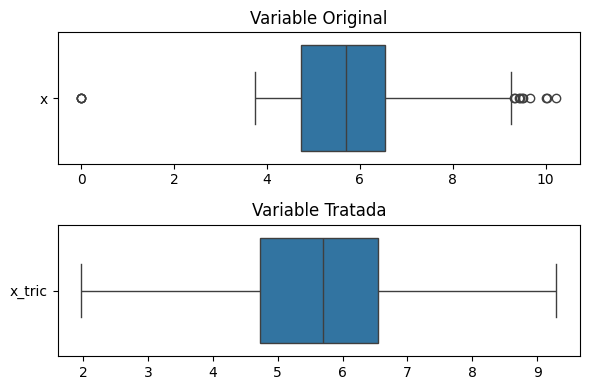

In [913]:
# Crear figura y subplots
fig, axes = plt.subplots(2, 1, figsize=(6, 4))

ax1 = axes[0]
sns.boxplot(data=train[['x']], orient="h", ax=ax1)
ax1.set_title('Variable Original')

ax2 = axes[1]
sns.boxplot(data=train[['x_tric']], orient="h", ax=ax2)
ax2.set_title('Variable Tratada')

plt.tight_layout()


plt.show()

>**Observación**
>- Como se puede observar en la imagen ya no se tiene valores outliers y fueron tratados mediante rangos intercuartiles

**5.2. Tratamiento de missings**

[![tenicas-imputaci-n.png](https://i.postimg.cc/jjPp1TQv/tenicas-imputaci-n.png)](https://postimg.cc/v1821pK6)

>-**Imputación de valores:** 
>- En lugar de eliminar los valores faltantes, se pueden reemplazar por valores estimados o imputados. Esto implica reemplazar los valores faltantes con medidas de tendencia central, como la media o la mediana, o utilizar métodos más avanzados como la regresión o el algoritmo K-NN para estimar los valores faltantes basándose en otros atributos del conjunto de datos.

*Variables hasta el momento*


In [914]:
actual_features = [x + '_tric' for x in preselection.feature.tolist()]
actual_features

['price_tric',
 'x_tric',
 'z_tric',
 'carat_tric',
 'y_tric',
 'rango_carat_tric',
 'clarity_tric',
 'table_tric',
 'color_tric']

*Tratamiento mediante estadistica de tendencia central(median) para train y test en valores missing*

[![tencial-central.png](https://i.postimg.cc/5NDkWGtr/tencial-central.png)](https://postimg.cc/JGcQbpZ3)

In [915]:
train[[x + '_imp' for x in actual_features]] = train[actual_features].fillna(train[actual_features].median())
test[[x + '_imp' for x in actual_features]] = test[actual_features].fillna(train[actual_features].median())

In [916]:
train[[x + '_imp' for x in actual_features]].head(10)

,price_tric_imp,x_tric_imp,z_tric_imp,carat_tric_imp,y_tric_imp,rango_carat_tric_imp,clarity_tric_imp,table_tric_imp,color_tric_imp
33058,6.701960,4.33,2.66,0.30,4.38,1.0,6.0,56.0,4.0
14626,8.683047,6.88,4.26,1.24,6.84,2.0,2.0,56.0,1.0
48729,7.606885,5.70,3.20,0.52,5.14,1.0,5.0,56.0,3.0
38826,6.954639,4.43,2.71,0.32,4.44,1.0,5.0,55.8,6.0
48734,7.606885,5.16,3.20,0.52,5.71,1.0,5.0,55.0,3.0
28906,6.527958,4.32,2.64,0.30,4.35,1.0,5.0,57.0,3.0
10381,6.383507,4.14,2.67,0.29,4.11,1.0,3.0,62.0,6.0
20566,9.091219,6.81,4.17,1.21,5.71,2.0,3.0,57.0,4.0
12587,8.572249,6.99,4.11,1.23,6.97,2.0,1.0,58.0,6.0
38428,6.933423,5.04,3.14,0.48,5.05,1.0,3.0,54.0,2.0


**5.3. Reescalamiento de datos**

>**Observación**
>- Es un proceso en el análisis de datos que consiste en transformar las variables para que tengan una escala común o un rango específico. El objetivo principal del reescalamiento de datos es colocar todas las variables en una misma escala numérica, lo cual puede facilitar la comparación y el análisis de las variables.
>- Z-Score Scaling: También conocido como estandarización, transforma los datos para que tengan una media de 0 y una desviación estándar de 1. La fórmula para la estandarización es:
x_std = (x - mean(x)) / std(x)

In [917]:
actual_features = [x + '_imp' for x in actual_features]

In [918]:
actual_features

['price_tric_imp',
 'x_tric_imp',
 'z_tric_imp',
 'carat_tric_imp',
 'y_tric_imp',
 'rango_carat_tric_imp',
 'clarity_tric_imp',
 'table_tric_imp',
 'color_tric_imp']

*Estandarizando las variables para mantener todas en una misma escala*


In [919]:
train[[x + '_std' for x in actual_features]] = (train[actual_features] - train[actual_features].mean())/train[actual_features].std()
test[[x + '_std' for x in actual_features]] = (test[actual_features] - train[actual_features].mean())/train[actual_features].std()

In [920]:
train[[x + '_std' for x in actual_features]].head()

,price_tric_imp_std,x_tric_imp_std,z_tric_imp_std,carat_tric_imp_std,y_tric_imp_std,rango_carat_tric_imp_std,clarity_tric_imp_std,table_tric_imp_std,color_tric_imp_std
33058,-1.072190,-1.397077,-1.416883,-1.078418,-1.355146,-0.660705,1.781896,-0.673599,0.351277
14626,0.875968,1.139499,1.160965,0.970168,1.114081,0.680078,-0.642012,-0.673599,-1.413249
48729,-0.182307,-0.034289,-0.546859,-0.598961,-0.592296,-0.660705,1.175919,-0.673599,-0.236898
38826,-0.823711,-1.297603,-1.336326,-1.034831,-1.294921,-0.660705,1.175919,-0.766539,1.527629
48734,-0.182307,-0.571446,-0.546859,-0.598961,-0.020158,-0.660705,1.175919,-1.138299,-0.236898


<a id='sec_6'></a>
## `6. Modelo de regresión Lineal`

En este caso debemos de utilizar el modelo de regresión lineal y evaluar nuestras métricas

Etapas:

1. Regresión Lineal por MCO
2. Modelo inicial exploratorio
3. Técnicas de selección de variables
4. Independencia entre variables predictoras

 **6.1.Regresión Lineal por MCO**

In [921]:
# Utilizamos el target con tratamiento de outliers, debido a que no es necesario estandarizar ni hacer tratamiento de missings en este (solo aplica para el target)
[x for x in train.columns.tolist() if 'price' in x]

['price', 'price_tric', 'price_tric_imp', 'price_tric_imp_std']

In [922]:
# Variables finalmente tratadas
actual_features = [x + '_std' for x in actual_features]

In [923]:
actual_features.remove(target + '_tric_imp_std')

 **6.2.modelo inicial exploratorio**

In [924]:
import statsmodels.api as sm

# Fit and summarize OLS model
lr = sm.OLS(train[target + '_tric'],
             sm.add_constant(train[actual_features]))
model = lr.fit()

In [925]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             price_tric   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 7.207e+04
Date:                Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:26:22   Log-Likelihood:                -1524.1
No. Observations:               37719   AIC:                             3066.
Df Residuals:                   37710   BIC:                             3143.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

**6.3.Técnicas de selección de variable**

Son técnicas utilizadas en la selección de variables en modelos de regresión para determinar qué variables son las más relevantes o significativas para predecir la variable dependiente.

> **Backward**: Este método, comienza con un modelo que incluye todas las variables predictoras y luego, de forma iterativa, vas eliminando una variable a la vez, basándote en algún criterio predefinido, como el valor p. En cada iteración, se elimina la variable que tiene el menor impacto en el modelo hasta que se cumple un criterio de parada predefinido, como un nivel de significancia o un umbral de mejora en el ajuste.

*Método Backward en python*

In [926]:
import copy

# Realizar una copia profunda de la lista
features_to_backward = copy.deepcopy(actual_features)

# Fit and summarize OLS model
lr = sm.OLS(train[target + '_tric'],
            sm.add_constant(train[features_to_backward]))
model = lr.fit()

while sum(model.pvalues > 0.05) >= 1:
  toRemove = pd.DataFrame(model.pvalues).idxmax(axis=0)[0]
  print(f'Retirando la variable: {toRemove}')
  features_to_backward.remove(toRemove)

  # Fit and summarize OLS model
  lr = sm.OLS(train[target + '_tric'],
            sm.add_constant(train[features_to_backward]))
  model = lr.fit()

In [927]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             price_tric   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 7.207e+04
Date:                Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:26:22   Log-Likelihood:                -1524.1
No. Observations:               37719   AIC:                             3066.
Df Residuals:                   37710   BIC:                             3143.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

| **Clave** | **Descripción** | **Tipo de dato** |
|---|---|---|
| price | precio en dólares estadounidenses | Int |
| carat | Peso en quilates del diamante | Float |
| cut | calidad de corte del corte (Fair, Good, Very Good, Premium, Ideal) | Object |
| color | color del diamante de J (peor) a D (mejor) | Object |
| clarity | medida de qué tan claro es el diamante (I1 (peor), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (mejor)). | Object |
| x | longitud en mm | Float |
| y | ancho en mm | Float |
| z | Profundidad en mm | Float |
| depth | porcentaje de profundidad total | Float |
| table | Ancho de la parte superior del diamante en relación con el punto más ancho | Float |

---

In [928]:
final_features = ['carat_tric_imp_std', 'carat_tric_imp_std', 'x_tric_imp_std',
                  'z_tric_imp_std', 'y_tric_imp_std']

# Fit and summarize OLS model
lr = sm.OLS(train[target + '_tric'],
            sm.add_constant(train[final_features]))
model = lr.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             price_tric   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 5.889e+04
Date:                Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:26:23   Log-Likelihood:                -13122.
No. Observations:               37719   AIC:                         2.626e+04
Df Residuals:                   37713   BIC:                         2.631e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  7.7923      0

**6.4.Independencia entre variables predictoras**

>*Observaciones*** 
>- En un análisis de regresión, uno de los supuestos clave es el supuesto de independencia entre las variables independientes (predictoras). Este supuesto implica que no debe existir una relación sistemática o estructurada entre las variables independientes, es decir, que las variables deben ser independientes entre sí.
>- La independencia entre las variables independientes es importante para evitar problemas de multicolinealidad, que ocurren cuando existe una alta correlación entre las variables predictoras. La multicolinealidad puede hacer que los coeficientes estimados sean poco confiables o difíciles de interpretar.
>- La violación del supuesto de independencia puede afectar negativamente la precisión y confiabilidad del modelo de regresión. Si existe una dependencia entre las variables independientes, esto puede introducir sesgos en las estimaciones de los coeficientes de regresión y dificultar la interpretación de los resultados.

In [929]:
train[['carat_tric_imp_std', 'rango_carat_tric_imp_std', 'x_tric_imp_std',
'z_tric_imp_std', 'y_tric_imp_std', 'color_tric_imp_std','clarity_tric_imp_std', target + '_tric']].corr()


,carat_tric_imp_std,rango_carat_tric_imp_std,x_tric_imp_std,z_tric_imp_std,y_tric_imp_std,color_tric_imp_std,clarity_tric_imp_std,price_tric
carat_tric_imp_std,1.000000,0.926544,0.880398,0.873298,0.876802,-0.289703,-0.354140,0.933121
rango_carat_tric_imp_std,0.926544,1.000000,0.780542,0.771853,0.776231,-0.275324,-0.271574,0.812957
x_tric_imp_std,0.880398,0.780542,1.000000,0.791248,0.798979,-0.245247,-0.333781,0.858198
z_tric_imp_std,0.873298,0.771853,0.791248,1.000000,0.790204,-0.243835,-0.331089,0.853696
y_tric_imp_std,0.876802,0.776231,0.798979,0.790204,1.000000,-0.237588,-0.331836,0.858201
color_tric_imp_std,-0.289703,-0.275324,-0.245247,-0.243835,-0.237588,1.000000,-0.023146,-0.155016
clarity_tric_imp_std,-0.354140,-0.271574,-0.333781,-0.331089,-0.331836,-0.023146,1.000000,-0.214268
price_tric,0.933121,0.812957,0.858198,0.853696,0.858201,-0.155016,-0.214268,1.000000


Nos quedaremos con variables con correlación no menor al 80%

In [930]:
final_features = ['carat_tric_imp_std', 'rango_carat_tric_imp_std', 'x_tric_imp_std',
                  'z_tric_imp_std', 'y_tric_imp_std']
lr = sm.OLS(train[target + '_tric'],
            sm.add_constant(train[final_features]))
model = lr.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             price_tric   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                 6.580e+04
Date:                Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:26:23   Log-Likelihood:                -11256.
No. Observations:               37719   AIC:                         2.252e+04
Df Residuals:                   37713   BIC:                         2.258e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [931]:
final_features

['carat_tric_imp_std',
 'rango_carat_tric_imp_std',
 'x_tric_imp_std',
 'z_tric_imp_std',
 'y_tric_imp_std']

In [932]:
wald_test = model.wald_test_terms()
wald_test

C:\Users\EQUIPO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:1914: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


<class 'statsmodels.stats.contrast.WaldTestResults'>
                                               F                      P>F  df constraint  df denom
const                      [[21532475.15731143]]                      0.0              1   37713.0
carat_tric_imp_std        [[14753.617898958972]]                      0.0              1   37713.0
rango_carat_tric_imp_std  [[3875.0445344600653]]                      0.0              1   37713.0
x_tric_imp_std             [[715.1948094124476]]    4.26435471265407e-156              1   37713.0
z_tric_imp_std             [[799.3288734945047]]   4.970233946195746e-174              1   37713.0
y_tric_imp_std             [[914.4928246342026]]  1.6440227816415332e-198              1   37713.0

In [933]:
# Primer método para pesos: Pesos de wald
wald_test = model.wald_test_terms()

weights = pd.DataFrame({'features': ['carat_tric_imp_std',
 'rango_carat_tric_imp_std',
 'x_tric_imp_std',
 'z_tric_imp_std',
 'y_tric_imp_std'],
              'F' : [14753.617898958972, 3875.0445344600653, 715.1948094124476, 799.3288734945047,914.4928246342026]})

weights['Pesos_wald'] = weights.F/weights.F.sum()
weights

C:\Users\EQUIPO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:1914: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


,features,F,Pesos_wald
0,carat_tric_imp_std,14753.617899,0.700629
1,rango_carat_tric_imp_std,3875.044534,0.184020
2,x_tric_imp_std,715.194809,0.033964
3,z_tric_imp_std,799.328873,0.037959
4,y_tric_imp_std,914.492825,0.043428


<a id='sec_7'></a>
## `7. Métricas de desempeño`

En este caso debemos de las metricas de desempeño para evaluar nuestro modelo

Etapas:

1. Puntuación del modelo
2. Calculamos las principales métricas de desempeñ

**7.1.Puntuación del modelo**

In [934]:
train['const'] = 1
train['prediction'] = model.predict(train[model.params.index.tolist()])
train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,...,x_tric_imp_std,z_tric_imp_std,carat_tric_imp_std,y_tric_imp_std,rango_carat_tric_imp_std,clarity_tric_imp_std,table_tric_imp_std,color_tric_imp_std,const,prediction
33058,0.30,4.0,4.0,6.0,61.1,56.0,6.701960,4.33,4.38,2.66,...,-1.397077,-1.416883,-1.078418,-1.355146,-0.660705,1.781896,-0.673599,0.351277,1,6.534569
14626,1.24,4.0,1.0,2.0,62.1,56.0,8.683047,6.88,6.84,4.26,...,1.139499,1.160965,0.970168,1.114081,0.680078,-0.642012,-0.673599,-1.413249,1,8.864512
48729,0.52,4.0,3.0,5.0,62.1,56.0,7.606885,NaN,5.14,3.20,...,-0.034289,-0.546859,-0.598961,-0.592296,-0.660705,1.175919,-0.673599,-0.236898,1,7.293088
38826,0.32,4.0,6.0,5.0,61.3,55.8,6.954639,4.43,4.44,2.71,...,-1.297603,-1.336326,-1.034831,-1.294921,-0.660705,1.175919,-0.766539,1.527629,1,6.600313
48734,0.52,4.0,3.0,5.0,62.3,55.0,7.606885,5.16,NaN,3.20,...,-0.571446,-0.546859,-0.598961,-0.020158,-0.660705,1.175919,-1.138299,-0.236898,1,7.302946


In [935]:
model.params

const                       7.792273
carat_tric_imp_std          0.952448
rango_carat_tric_imp_std   -0.292775
x_tric_imp_std              0.097067
z_tric_imp_std              0.099902
y_tric_imp_std              0.108362
dtype: float64

In [936]:
train['price_pred'] = (7.792273 + 0.952448*train.carat_tric_imp_std
                              -0.292775*train.rango_carat_tric_imp_std
                              + 0.097067*train.x_tric_imp_std
                              + 0.099902*train.z_tric_imp_std
                              + 0.108362*train.y_tric_imp_std)

In [937]:
train[['price_tric', 'price_pred']].head(10)

,price_tric,price_pred
33058,6.701960,6.534568
14626,8.683047,8.864513
48729,7.606885,7.293088
38826,6.954639,6.600312
48734,7.606885,7.302946
28906,6.527958,6.527120
10381,6.383507,6.467708
20566,9.091219,8.658088
12587,8.572249,8.844373
38428,6.933423,7.126886


In [938]:
train['price_pred'] = model.predict(sm.add_constant(train[final_features]))
test['price_pred'] = model.predict(sm.add_constant(test[final_features]))

También podemos utilizar la sentencia predict del modelo

In [939]:
final_features = ['carat_tric_imp_std',
 'rango_carat_tric_imp_std',
 'x_tric_imp_std',
 'z_tric_imp_std',
 'y_tric_imp_std']

**7.2.Calculamos las principales métricas de desempeño**

In [940]:
from sklearn.metrics import *
from math import sqrt

In [941]:
r2_score(train.price_tric, train.price_pred)

0.8971560626120497

In [942]:
# calculamos las principales métricas de desempeño para un modelo de regresión

preformance = pd.DataFrame({'metric' : ['r2', 'mape', 'mse', 'rmse', 'mae'],
                            'train' : [r2_score(train[target + '_tric'], train[target + '_pred']),
                                      mean_absolute_percentage_error(train[target + '_tric'], train[target + '_pred']),
                                      mean_squared_error(train[target + '_tric'], train[target + '_pred']),
                                      sqrt(mean_squared_error(train[target + '_tric'], train[target + '_pred'])),
                                      mean_absolute_error(train[target + '_tric'], train[target + '_pred'])
                                      ],
                            'test' : [r2_score(test[target + '_tric'], test[target + '_pred']),
                                      mean_absolute_percentage_error(test[target + '_tric'], test[target + '_pred']),
                                      mean_squared_error(test[target + '_tric'], test[target + '_pred']),
                                      sqrt(mean_squared_error(test[target + '_tric'], test[target + '_pred'])),
                                      mean_absolute_error(test[target + '_tric'], test[target + '_pred'])
                                      ]})

preformance

,metric,train,test
0,r2,0.897156,0.897713
1,mape,0.032027,0.031803
2,mse,0.106347,0.104158
3,rmse,0.326109,0.322736
4,mae,0.250343,0.247888


>**Observaciones**
>- R² (R cuadrado):
Train (0.897156) y Test (0.897713):
El valor de R² indica la proporción de la varianza en la variable dependiente que es explicada por el modelo. Un valor cercano a 1 sugiere que el modelo explica muy bien la variabilidad de los datos. En este caso, ambos valores son muy altos y similares, lo que indica un buen ajuste del modelo tanto en el conjunto de entrenamiento como en el de prueba.

>- MAPE (Mean Absolute Percentage Error):
Train (0.032027) y Test (0.031803):
El MAPE mide el error porcentual medio absoluto. Valores bajos indican que, en promedio, el modelo tiene un error pequeño en términos porcentuales. Aquí, ambos valores son bajos y muy similares, lo que sugiere que el modelo es preciso y consistente en ambos conjuntos.

>- MSE (Mean Squared Error):
Train (0.106347) y Test (0.104158):
El MSE mide el promedio de los errores al cuadrado. Valores bajos indican que el modelo tiene pocos errores grandes. En este caso, los valores son bastante bajos y similares, lo que sugiere que el modelo tiene un buen desempeño tanto en entrenamiento como en prueba.

>- RMSE (Root Mean Squared Error):
Train (0.326109) y Test (0.322736):
El RMSE es la raíz cuadrada del MSE y proporciona una medida de la magnitud promedio del error. Al igual que el MSE, valores bajos indican un buen rendimiento del modelo. Aquí, los valores son bajos y cercanos entre sí, indicando un buen rendimiento del modelo en ambos conjuntos.

>- MAE (Mean Absolute Error):
Train (0.250343) y Test (0.247888):
El MAE mide el error absoluto medio entre las predicciones y los valores reales. Valores más bajos indican menos errores. En este caso, los valores son bajos y muy similares, lo que sugiere que el modelo tiene un rendimiento constante y preciso en ambos conjuntos.

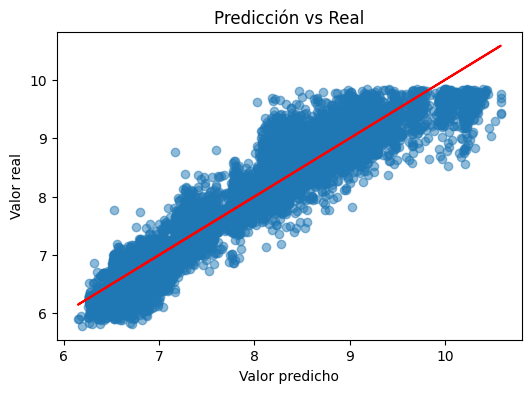

In [943]:
# Crear scatterplot
plt.figure(figsize=(6, 4))
plt.scatter(test[target + '_pred'], test[target + '_tric'], alpha = 0.5)
plt.plot(test[target + '_pred'], test[target + '_pred'], color='red')

# Personalizar el título y los nombres de los ejes
plt.title(f"Predicción vs Real")
plt.xlabel("Valor predicho")
plt.ylabel("Valor real")

# Mostrar el gráfico
plt.show()

<a id='sec_8'></a>
## `8. Conclusiones y Recomendaciones`

En este caso debemos 

Etapas:

1. Conclusiones y Recomendaciones

**8.1. Conclusiones y Recomendaciones**

La variable ‘Precio’ presentó un comportamiento lognormal (algo que se esperaba, ya que hay mayor número de valores bajos y menor cantidad de valores altos). Este cambio de variable permitió un mejor ajuste en el modelo de regresión lineal.​

Es importante discernir de manera sustentada la no dependencia de la variable objetivo con respecto a otras variables, ya que ello permitirá que el modelo sea más limpio y eficiente.​

De los resultados obtenidos del modelo desarrollado se puede concluir que existe buena correlación de las variables empleadas.​

Debido al hallazgo de alto contraste de los precios alrededor de ciertos valores de quilate (1, 1.5 y 2), se recomienda desarrollar modelos para cada grupo de quilates.